In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import iv,kv
from scipy.constants import G
import scipy.stats as stats
import emcee
import corner
from scipy import optimize

## Load the data

In [2]:
upper = np.array([14.167003734595047,
 49.97431073395482,
 72.5,
 85.37130446247137,
 109.95423178063167,
 127.91254205765507,
 145.77170400057338,
 165.18851518584236,
 184.56223929982696,
 212.43045841039816,
 238.10501932033685])


lower= np.array([49.62935953357682,
 71.87020751200633,
 85.17038192052048,
 109.36090880673645,
 127.87010315187942,
 145.67784796135706,
 164.99274254053182,
 184.52092101607988,
 212.21357884061808,
 237.1982529928589,
 382.20914639983226] )

In [4]:
for i in range(11):
    print((np.round(upper[i],2),np.round(lower[i],2)))

(14.17, 49.63)
(49.97, 71.87)
(72.5, 85.17)
(85.37, 109.36)
(109.95, 127.87)
(127.91, 145.68)
(145.77, 164.99)
(165.19, 184.52)
(184.56, 212.21)
(212.43, 237.2)
(238.11, 382.21)


In [ ]:
bb=[56, 56, 57, 169, 169, 169, 169, 169, 169, 85, 86]

In [4]:
data=[]
for i in range(len(upper)):
    df=pd.read_csv('{mini}<$V_opt$<{maxi}_2210.csv'.format(mini=np.round(upper[i],2),maxi=np.round(lower[i],2)))
    data.append(df)
    
data[0]

,Unnamed: 0,r,v,err
0,0,0.022231,0.145995,0.025139
1,1,0.065263,0.261940,0.030345
2,2,0.108089,0.345543,0.033360
3,3,0.152501,0.441523,0.031962
4,4,0.194726,0.471954,0.040896
5,5,0.238021,0.579021,0.045597
6,6,0.293652,0.650536,0.026341
7,7,0.365581,0.714003,0.025999
8,8,0.440586,0.767634,0.025692
9,9,0.523141,0.843951,0.026751


<ErrorbarContainer object of 3 artists>

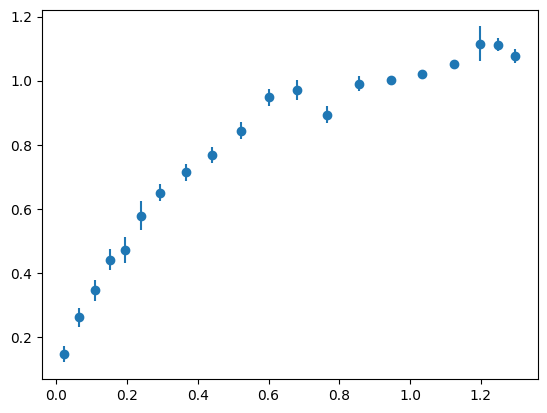

In [5]:
plt.errorbar(data[0]['r'],data[0]['v'],data[0]['err'],fmt='o')

In [5]:
vopts=np.array([36.259482451107274, 61.5834661478677, 79.73556051877897, 
                98.09412632855788, 119.46049589287385, 136.04621974728303, 
                155.66264931242966, 174.59799041185326, 197.45748252130463, 
                223.63149004725904, 268.3698612341104])
ropts=np.array([4.225303571428571, 6.274089285714285, 6.30677192982456, 
                8.194017751479292, 9.08096449704142, 9.937727810650888, 
                10.952810650887574, 12.265952662721894, 13.970473372781063,
                15.433858823529414, 16.497232558139537]

)

In [7]:
np.round(ropts,2)

array([ 4.23,  6.27,  6.31,  8.19,  9.08,  9.94, 10.95, 12.27, 13.97,
       15.43, 16.5 ])

In [7]:
df=pd.DataFrame({'Vopt':vopts,'RD':ropts/3})
df

,Vopt,RD
0,36.259482,1.408435
1,61.583466,2.091363
2,79.735561,2.102257
3,98.094126,2.731339
4,119.460496,3.026988
5,136.046220,3.312576
6,155.662649,3.650937
7,174.597990,4.088651
8,197.457483,4.656824
9,223.631490,5.144620


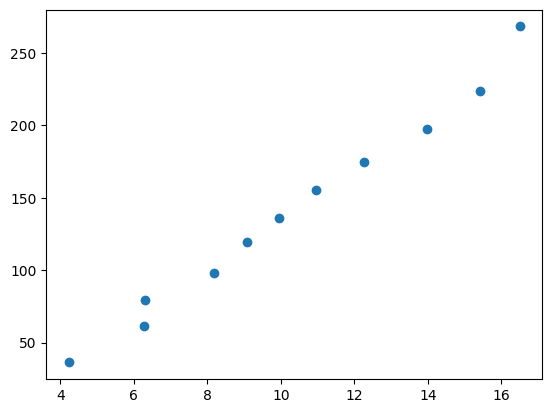

In [8]:
plt.scatter(ropts,vopts)

In [9]:
for i in range(11):
    print(data[i]['v'][data[i]['v']<0])

Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)
Series([], Name: v, dtype: float64)


## Burkert

<ErrorbarContainer object of 3 artists>

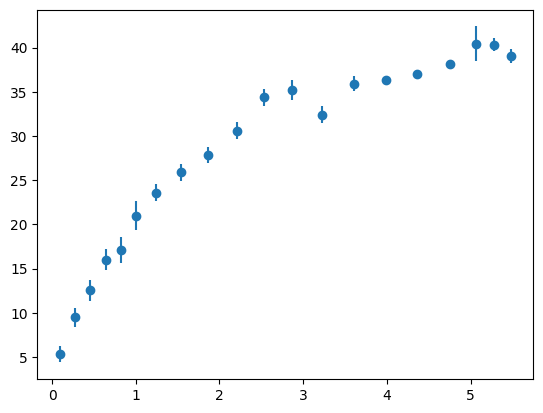

In [13]:
x=data[0]['r']*ropts[0]
y=data[0]['v']*vopts[0]
dy=data[0]['err']*vopts[0]
conv=3.086e19
plt.errorbar(x,y,dy,fmt='o')

In [11]:
def log_probability(theta, x, y, yerr,ropt,vopt,xd):
    lp = log_prior(theta,ropt,vopt,xd)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr,ropt,vopt)

In [11]:
def disk(theta,x, ropt,vopt):
    
    
    logmd,logp,rc,logsigma=theta
    rx=1.5*(x/ropt)
    md=np.power(10,logmd)
    
    return (((2e24/(3.086e19))*G*md*(x)**2)/2/((ropt/3)**3))*(iv(0,rx)*kv(0,rx)-iv(1,rx)*kv(1,rx))

def burkert(theta,x, ropt,vopt):
    
    logmd,logp,rc,logsigma=theta
    
    p=np.power(10,logp)
    #if (any(x/rc) <-1):
       # print (x,rc)
    
    return conv**2*1e-3*2*np.pi*p*(rc)**3*G/(x)*(np.log(1+(x/rc))-np.arctan(x/rc)+0.5*np.log(1+(x/rc)**2)) 


def model(theta,x, ropt,vopt):
    return np.sqrt(burkert(theta,x, ropt,vopt)+disk(theta,x, ropt,vopt))

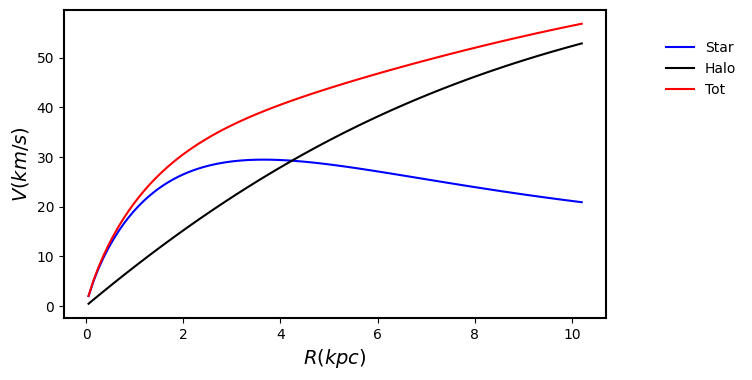

In [13]:
def check_disk(p0,rc,md,ropt,vopt):
    
    x=np.linspace(2*ropt,0.01*ropt,100)

    fig,ax=plt.subplots(figsize=(7,4))
    plt.plot(x,np.sqrt(disk(np.array([md,p0,rc,2]),x,ropt,vopt)),color='blue',label='Star')
    #plt.axvline(2.2)
    plt.plot(x,np.sqrt(burkert(np.array([md,p0,rc,2]),x,ropt,vopt)),color='black',label='Halo')
    plt.plot(x,np.sqrt(burkert(np.array([md,p0,rc,2]),x,ropt,vopt)
                      +disk(np.array([md,p0,rc,2]),x,ropt,vopt)),color='red',label='Tot')
   
    plt.legend(frameon=False,loc=(1.1,0.7))
    plt.xlabel('$R(kpc)$',fontsize=14,fontweight='bold')
    plt.ylabel('$V(km/s)$',fontsize=14,fontweight='bold')
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    
check_disk(np.log10(3.7*1e-3*2e33/(3.086e+16)**3/1e6),10.7,np.log10(8.8e+8),3*1.7,43.5)

In [14]:
def log_likelihood(theta, x, y, yerr,ropt,vopt):
    _,_,_,logsigma=theta
    ymodel = model(theta,x,ropt,vopt)
    return -0.5 * (np.sum((y - ymodel) ** 2 / (yerr**2+(10**logsigma)**2))+np.sum(2*np.pi*(yerr**2+(10**logsigma)**2)))

In [15]:
bb=[56, 56, 57, 169, 169, 169, 169, 169, 169, 85, 86]

In [16]:
def plot_vels(no,theta_max):
    
    xplot=data[no]['r']*ropts[no]
    yplot=data[no]['v']*vopts[no]
    dyplot=data[no]['err']*vopts[no]
    x=np.linspace(max(xplot),min(xplot),100)

    fig,ax=plt.subplots(figsize=(5,4))
    plt.errorbar(xplot,yplot,dyplot,fmt='.',markersize=15,elinewidth=4,markerfacecolor='cornflowerblue', 
             markeredgecolor='black', ecolor='black',color='black',capsize=4,label='Data')
    plt.plot(x,model(theta_max,x,ropts[no],vopts[no]),linewidth=4,color='black',label='Model')
    plt.plot(x,np.sqrt(burkert(theta_max,x,ropts[no],vopts[no])),'--',color='red',label='Burkert Halo')
    #plt.plot(x,np.sqrt(bulge(theta_max,x,ropts[no],vopts[no])),color='pink',label='Bulge')
    plt.plot(x,np.sqrt(disk(theta_max,x,ropts[no],vopts[no])),color='blue',label='Disk')
    plt.title('Bin {}'.format(no+1))
    
    plt.text(x=min(xplot)+0.05,y=max(model(theta_max,x,ropts[no],vopts[no]))-6,s='N={}'.format(bb[no]),fontsize=12)
    plt.legend(frameon=False,loc=(1.1,0.7))
    plt.xlabel('$R(kpc)$',fontsize=14,fontweight='bold')
    plt.ylabel('$V(km/s)$',fontsize=14,fontweight='bold')
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)

In [17]:
labels=[r'$logM_d$','$logp$',r'$R_c$',r'$log\sigma_{int}$']

## Bin 1

In [18]:
def main(x,y,yerr,ropt,vopt):
    
    
    p1=np.random.uniform(8,12.5,25)
    #p2=np.random.uniform(5,11.5,25)
    p2=np.random.uniform(-26,-18,25)
    p3=np.random.uniform(0,100,25)
    p4=np.random.uniform(-3,3,25)
    pos=np.vstack((p1,p2,p3,p4)).T
    
    nwalkers, ndim = pos.shape
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr,ropt,vopt,x))
    sampler.run_mcmc(pos, 10000, progress=True)
    
#    tau = sampler.get_autocorr_time()        
        
    return sampler

In [19]:
def log_prior(theta,ropt,vopt,xd):
    
    logmd, logp, rc, logsigma = theta
    
    #Md in M_odot
    #p in g/cm3
    #rc in kpc
    
    
    if not ((8<logmd<12.5) and (0<rc<100) and (-26<logp<-18) and (-3<logsigma<3) and 
            ((disk(np.array([logmd,logp,rc,logsigma]),xd[0],ropt,vopt))**2>(burkert(np.array([logmd,logp,rc,logsigma]),xd[0],ropt,vopt))**2)):
        return -np.inf
    
    return  0.0

In [30]:
x=data[0]['r']*ropts[0]
y=data[0]['v']*vopts[0]
dy=data[0]['err']*vopts[0]
sampler=main(x,y,dy,ropts[0],vopts[0]) 
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [03:54<00:00, 42.71it/s]


In [31]:
samples=flat_samples

In [33]:
samples = samples[samples[:,1]< -24]

In [39]:
samples = samples[samples[:,2]< 16]

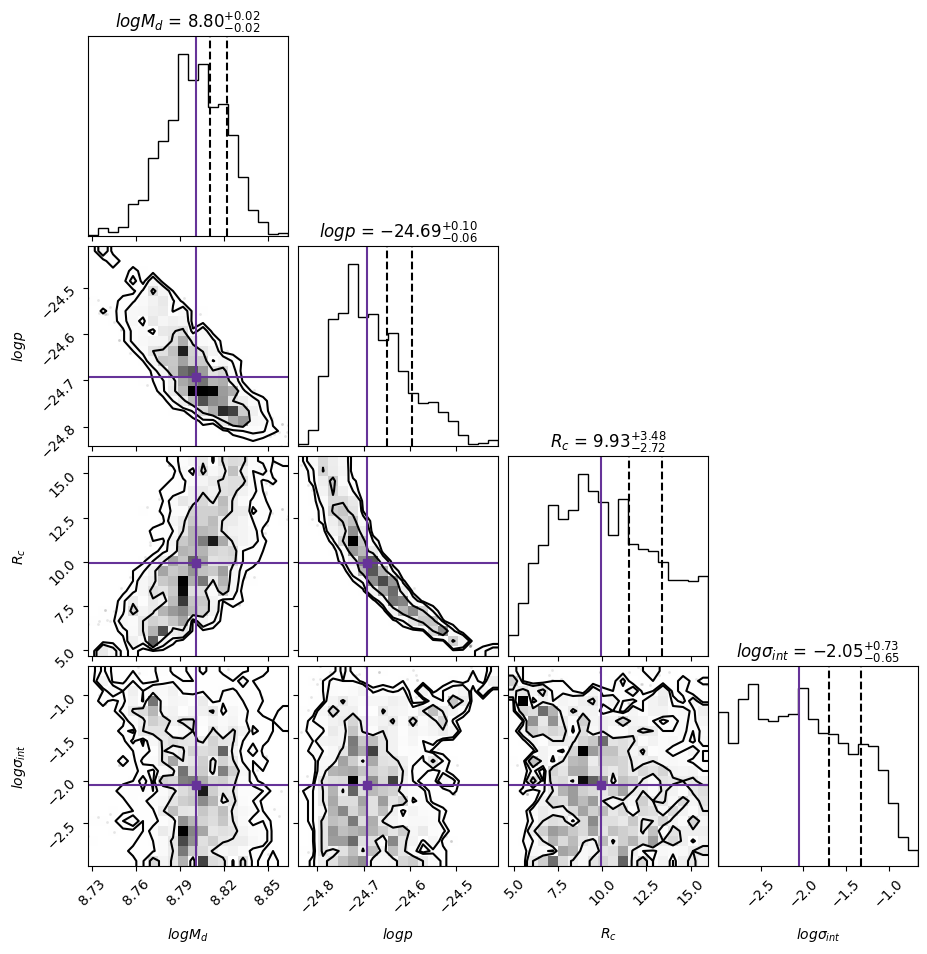

In [40]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))

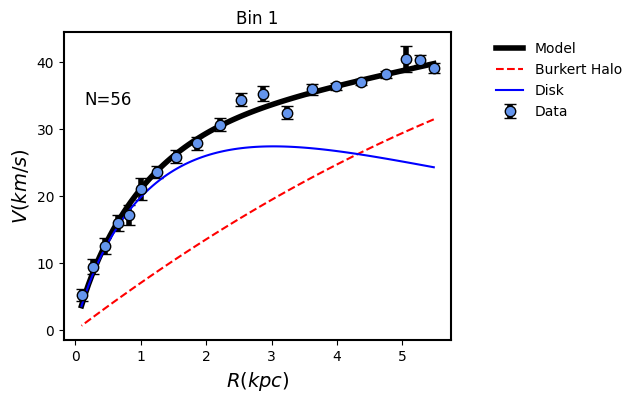

In [41]:
plot_vels(0,theta_max)

In [42]:
best=[]
best.append(theta_max)

## Bin 2

In [43]:
x=data[1]['r']*ropts[1]
y=data[1]['v']*vopts[1]
dy=data[1]['err']*vopts[1]
sampler=main(x,y,dy,ropts[1],vopts[1])

100%|█████████████████████████████████████| 10000/10000 [02:57<00:00, 56.32it/s]


In [44]:
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)
samples=flat_samples

In [32]:
samples = samples[samples[:,0]< 10.2]
samples = samples[samples[:,0]> 9]

In [46]:
samples = samples[samples[:,1]< -24]

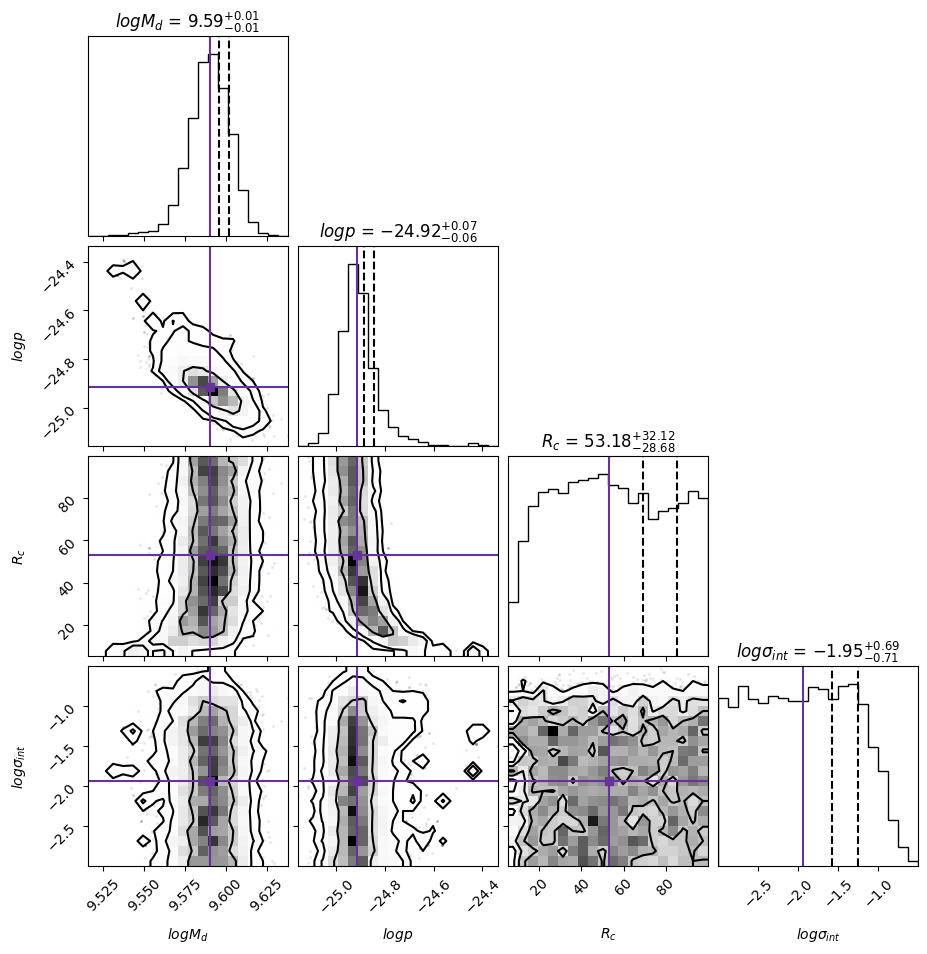

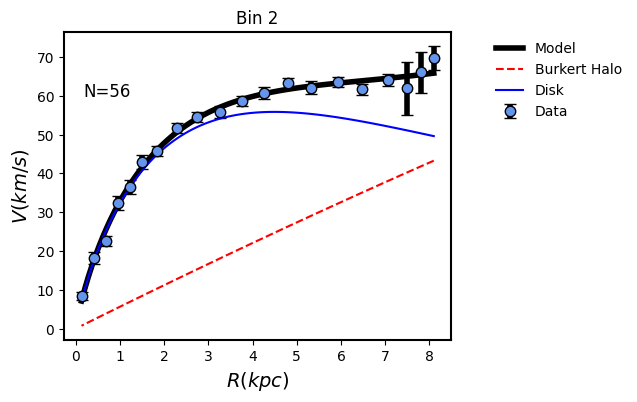

In [47]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(1,theta_max)

In [48]:
best.append(np.round(theta_max,2))

## Bin 3

In [49]:
x=data[2]['r']*ropts[2]
y=data[2]['v']*vopts[2]
dy=data[2]['err']*vopts[2]
sampler=main(x,y,dy,ropts[2],vopts[2])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [05:26<00:00, 30.62it/s]


In [50]:
samples=flat_samples

In [52]:
samples = samples[samples[:,1]< -22.5]

In [58]:
samples = samples[samples[:,2]< 45]

In [56]:
samples = samples[samples[:,0]> 9.5]

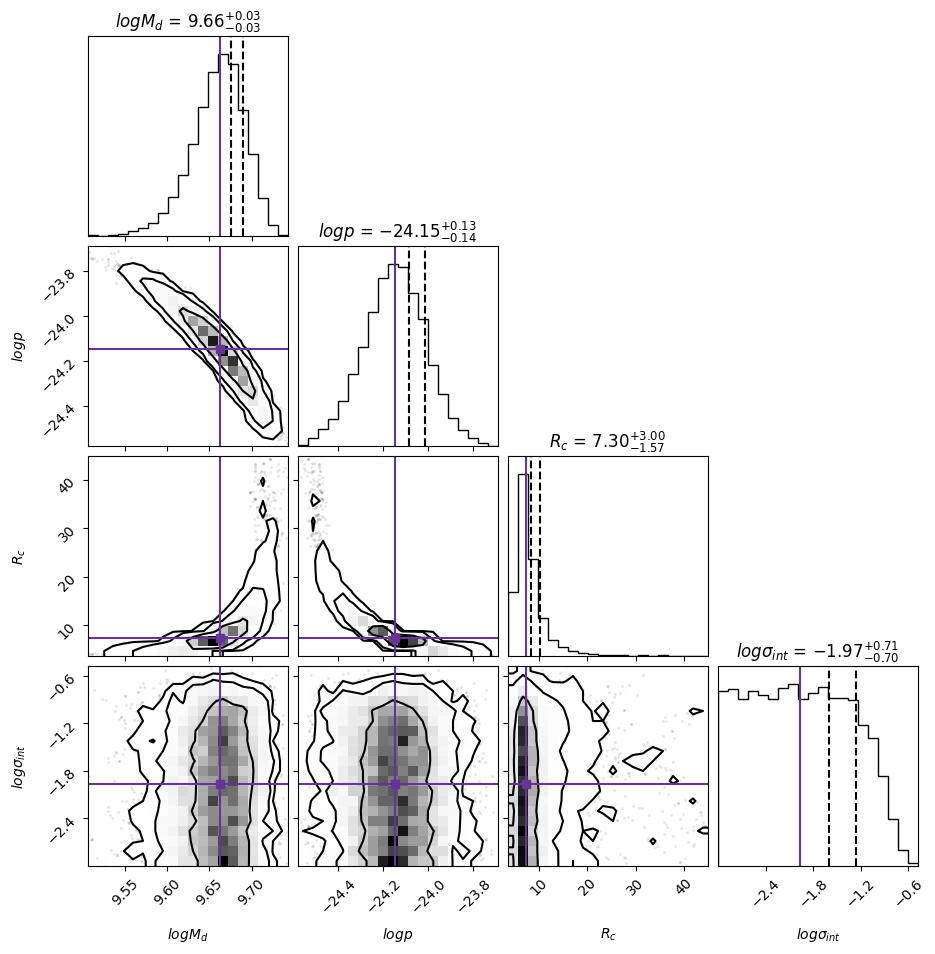

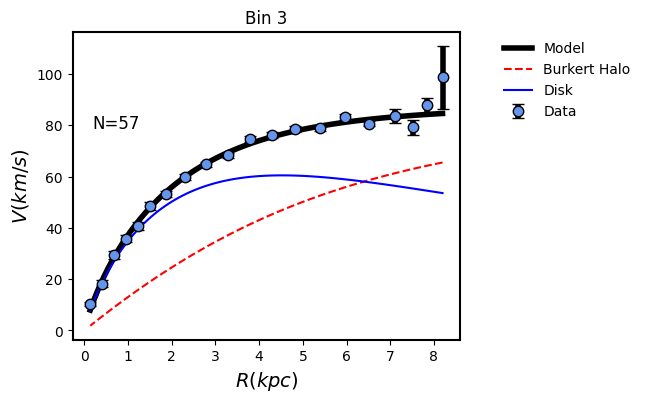

In [59]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(2,theta_max)

In [60]:
best.append(np.round(theta_max,2))

## Bin 4

In [61]:
x=data[3]['r']*ropts[3]
y=data[3]['v']*vopts[3]
dy=data[3]['err']*vopts[3]
sampler=main(x,y,dy,ropts[3],vopts[3])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [04:02<00:00, 41.30it/s]


In [62]:
samples=flat_samples

In [75]:
samples = samples[samples[:,1]< -24.32]

In [77]:
samples = samples[samples[:,2]< 24]

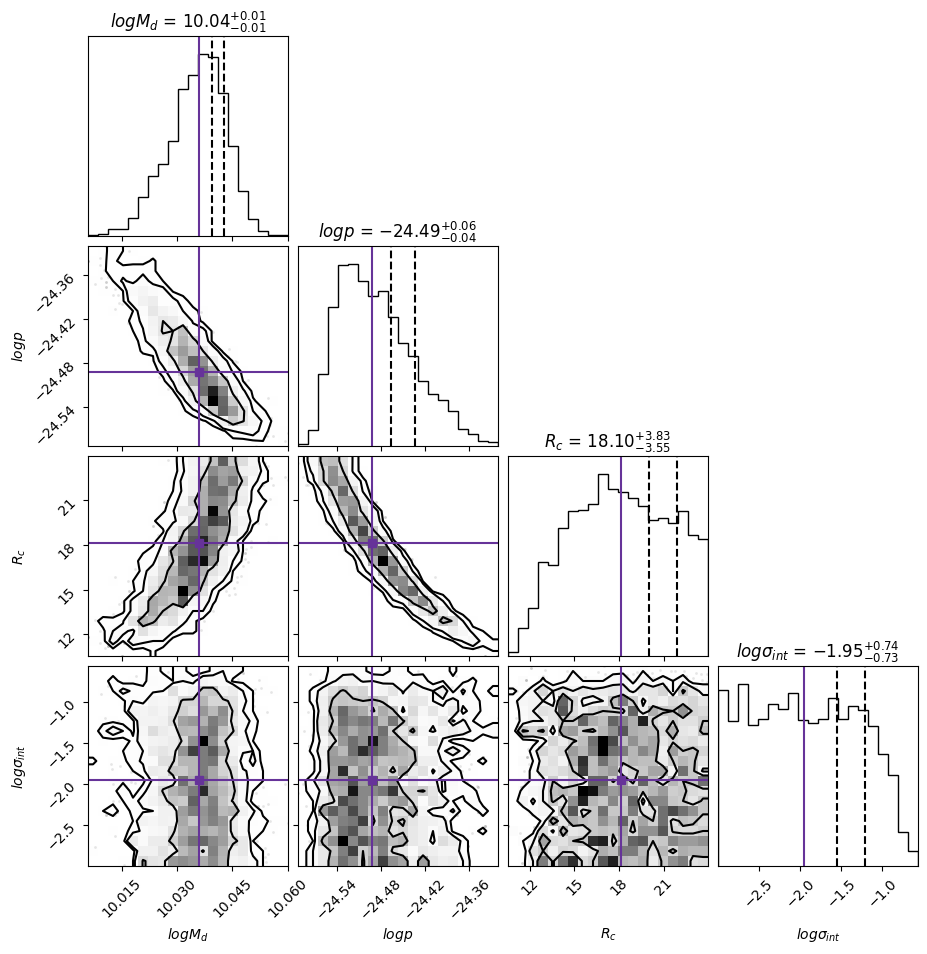

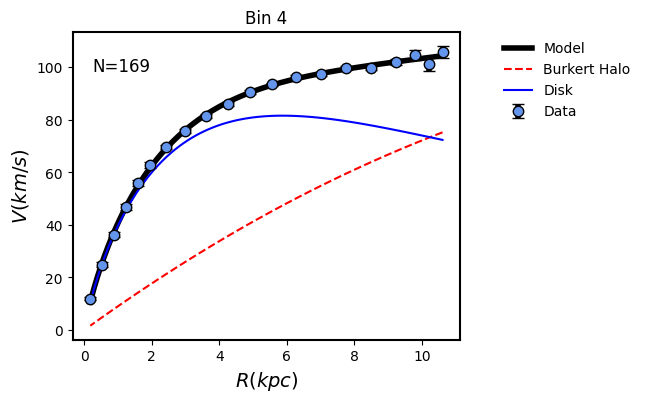

In [78]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(3,theta_max)

In [79]:
best.append(np.round(theta_max,2))

## Bin 5 

In [218]:
x=data[4]['r']*ropts[4]
y=data[4]['v']*vopts[4]
dy=data[4]['err']*vopts[4]
sampler=main(x,y,dy,ropts[4],vopts[4])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [03:42<00:00, 45.00it/s]


In [219]:
samples=flat_samples

In [223]:
samples = samples[samples[:,1]< -24.48]

In [123]:
samples = samples[samples[:,0]> 9.25]

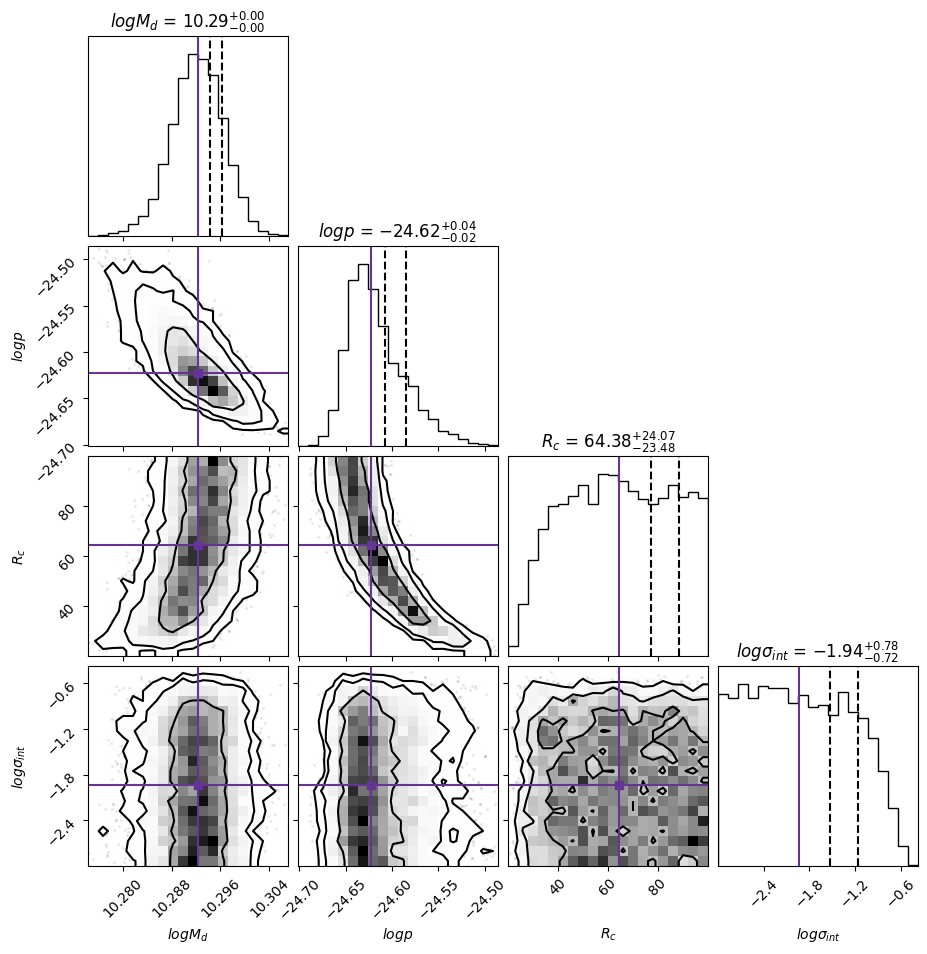

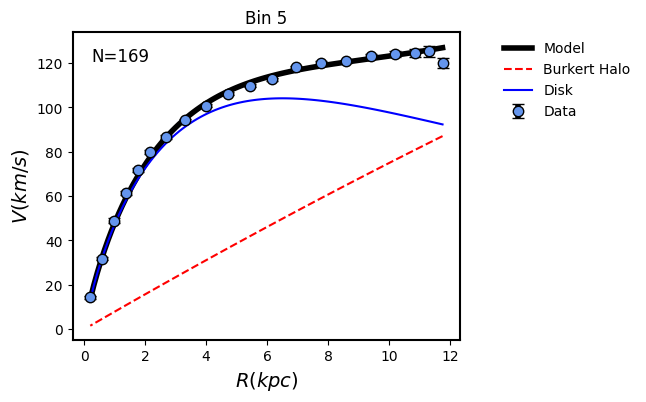

In [224]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(4,theta_max)

In [225]:
best[4]=np.round(theta_max,2)
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.29, -24.62,  64.38,  -1.94]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 1.084e+01, -2.494e+01,  8.765e+01,  8.000e-02]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61]),
 array([ 11.34, -24.88,  89.57,  -1.89])]

In [125]:
best.append(np.round(theta_max,2))
best

[array([  8.80050265, -24.69205049,   9.92555949,  -2.04562868]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  86.31,  -0.32]),
 array([ 10.49, -24.79,  85.61,  -0.32])]

In [126]:
best[-2]=best[-1]
best=best[0:-1]
best

[array([  8.80050265, -24.69205049,   9.92555949,  -2.04562868]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32])]

In [148]:
best=[
    np.array([  8.80, -24.69,   9.93,  -2.05]),
 np.array([  9.59, -24.92,  53.18,  -1.95]),
 np.array([  9.66, -24.15,   7.3 ,  -1.97]),
 np.array([ 10.04, -24.49,  18.1 ,  -1.95]),
 np.array([ 10.49, -24.79,  85.61,  -0.32])]


## Bin 6

In [149]:
x=data[5]['r']*ropts[5]
y=data[5]['v']*vopts[5]
dy=data[5]['err']*vopts[5]
sampler=main(x,y,dy,ropts[5],vopts[5])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [04:43<00:00, 35.25it/s]


In [150]:
samples=flat_samples

In [156]:
samples = samples[samples[:,1]< -24.6]

In [152]:
samples = samples[samples[:,0]< 10.56]

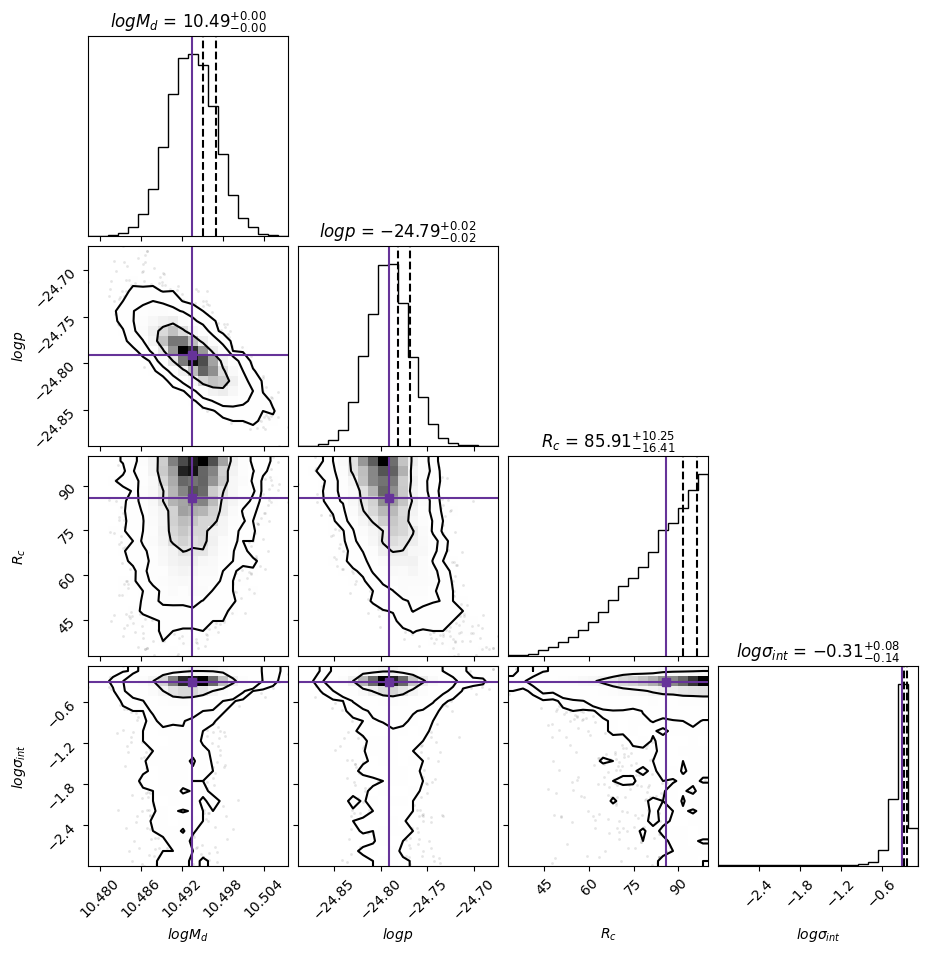

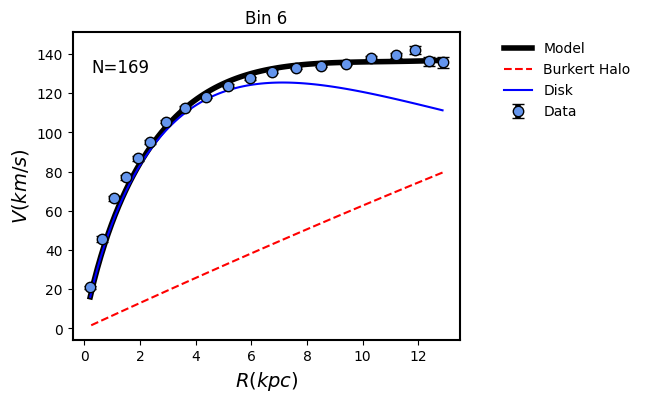

In [157]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(5,theta_max)

In [158]:
best.append(np.round(theta_max,2))
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31])]

## Bin 7

In [159]:
x=data[6]['r']*ropts[6]
y=data[6]['v']*vopts[6]
dy=data[6]['err']*vopts[6]
sampler=main(x,y,dy,ropts[6],vopts[6])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [03:36<00:00, 46.13it/s]


In [160]:
samples=flat_samples

In [161]:
samples = samples[samples[:,1]< -24.8]

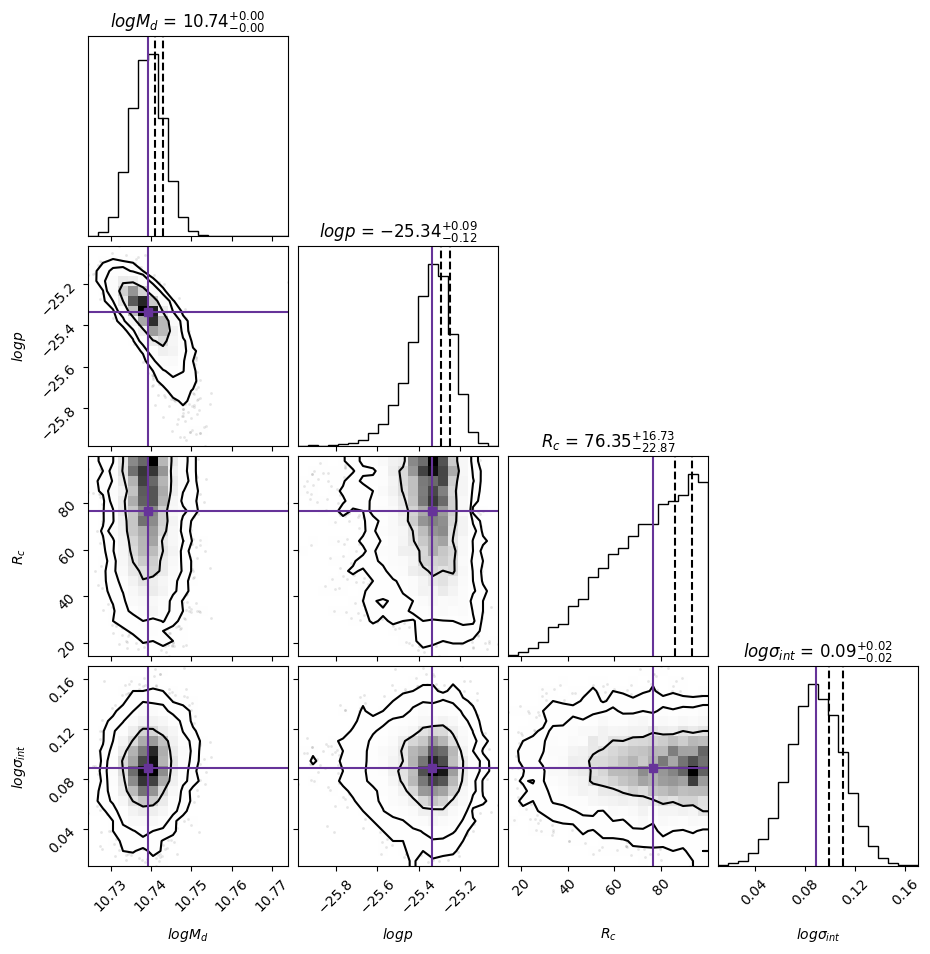

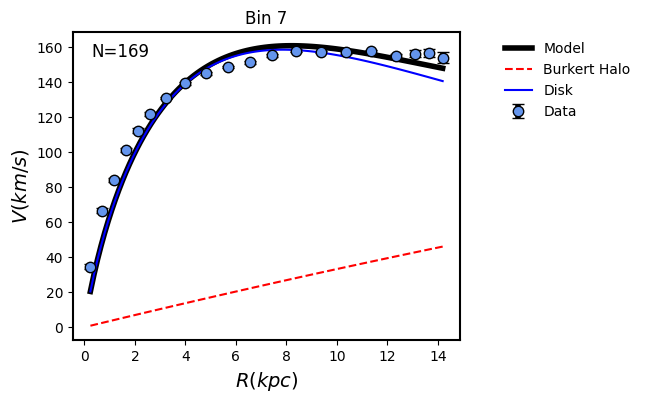

In [162]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(6,theta_max)

In [163]:
best.append(np.round(theta_max,2))
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09])]

## Bin 8

In [207]:
x=data[7]['r']*ropts[7]
y=data[7]['v']*vopts[7]
dy=data[7]['err']*vopts[7]
sampler=main(x,y,dy,ropts[7],vopts[7])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [02:43<00:00, 61.33it/s]


In [208]:
samples=flat_samples

In [212]:
samples = samples[samples[:,1]< -24.75]

In [176]:
samples = samples[samples[:,2]>60]

In [177]:
samples = samples[samples[:,0]<10.76]

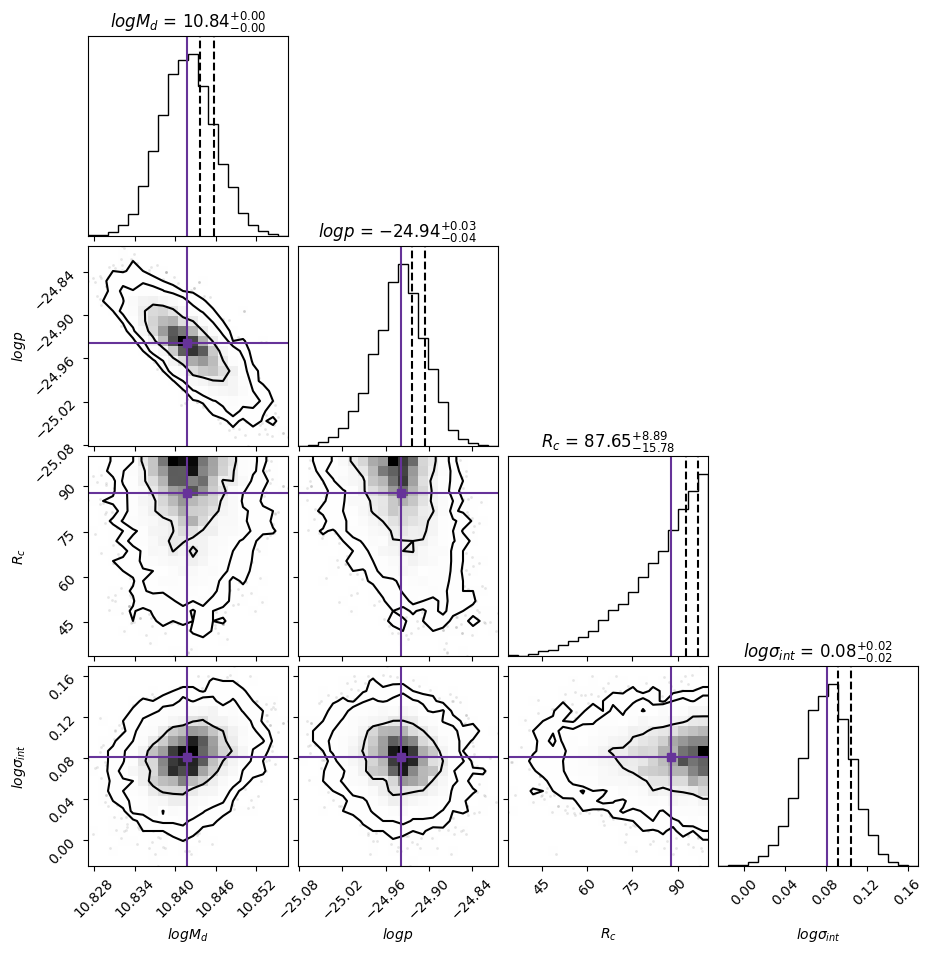

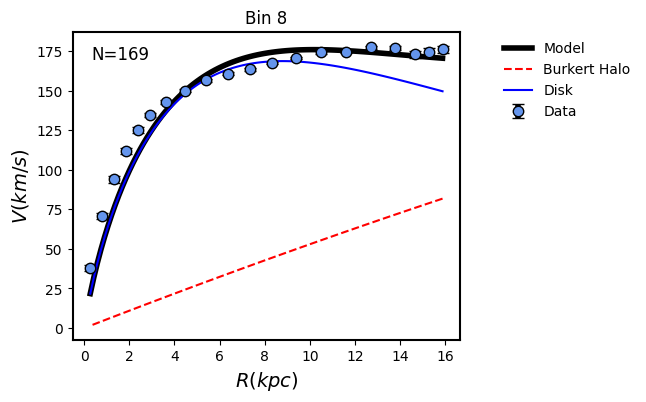

In [213]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(7,theta_max)

In [214]:
theta_max

array([ 1.08417881e+01, -2.49389039e+01,  8.76474057e+01,  8.13636465e-02])

In [215]:
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 10.74, -25.34,  82.75,   0.09]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61]),
 array([ 11.34, -24.88,  89.57,  -1.89])]

In [217]:
best[7]=np.round(theta_max,2)
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 1.084e+01, -2.494e+01,  8.765e+01,  8.000e-02]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61]),
 array([ 11.34, -24.88,  89.57,  -1.89])]

## Bin 9

In [180]:
x=data[8]['r']*ropts[8]
y=data[8]['v']*vopts[8]
dy=data[8]['err']*vopts[8]
sampler=main(x,y,dy,ropts[8],vopts[8])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [02:52<00:00, 57.96it/s]


In [185]:
samples=flat_samples

In [186]:
samples = samples[samples[:,1]<-24]

In [190]:
samples = samples[samples[:,0]>11]

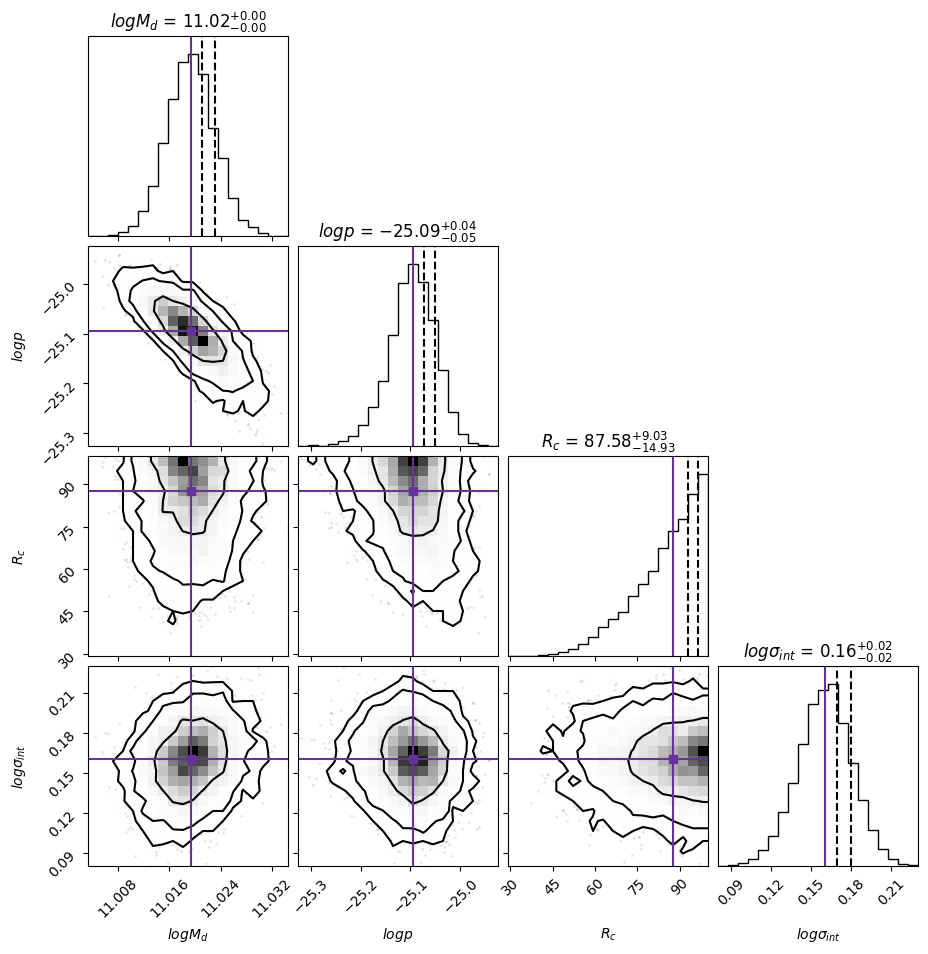

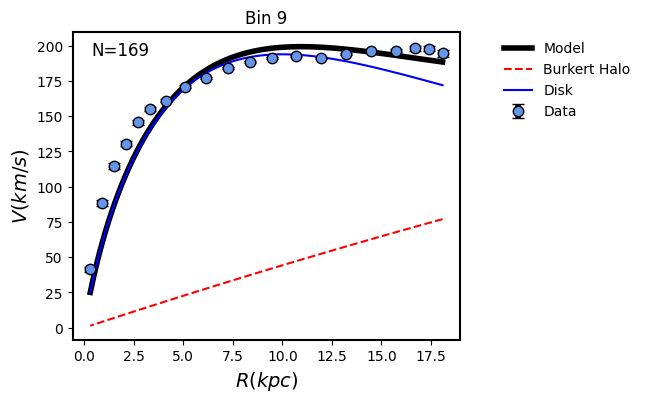

In [191]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(8,theta_max)

In [192]:
best.append(np.round(theta_max,2))
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 10.74, -25.34,  82.75,   0.09]),
 array([ 11.02, -25.09,  87.58,   0.16])]

## Bin 10

In [193]:
x=data[9]['r']*ropts[9]
y=data[9]['v']*vopts[9]
dy=data[9]['err']*vopts[9]
sampler=main(x,y,dy,ropts[9],vopts[9])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [03:19<00:00, 50.10it/s]


In [194]:
samples=flat_samples

In [198]:
samples = samples[samples[:,3]>-1.2]

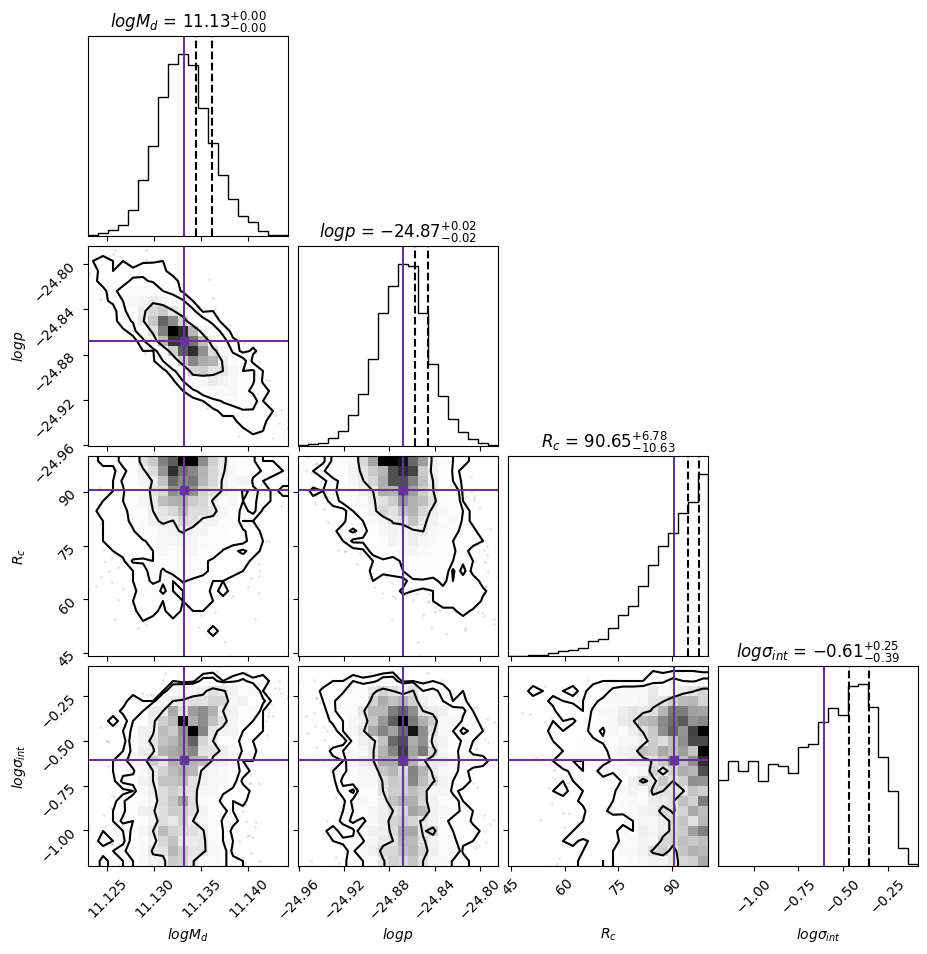

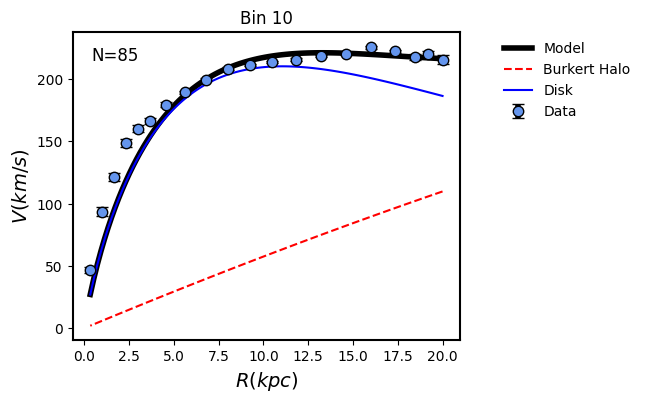

In [199]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(9,theta_max)

In [200]:
best.append(np.round(theta_max,2))
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 10.74, -25.34,  82.75,   0.09]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61])]

## Bin 11

In [201]:
x=data[10]['r']*ropts[10]
y=data[10]['v']*vopts[10]
dy=data[10]['err']*vopts[10]
sampler=main(x,y,dy,ropts[10],vopts[10])
flat_samples = sampler.get_chain(discard=3000,thin=10, flat=True)

100%|█████████████████████████████████████| 10000/10000 [03:39<00:00, 45.66it/s]


In [202]:
samples=flat_samples

In [204]:
samples = samples[samples[:,1]<-24]

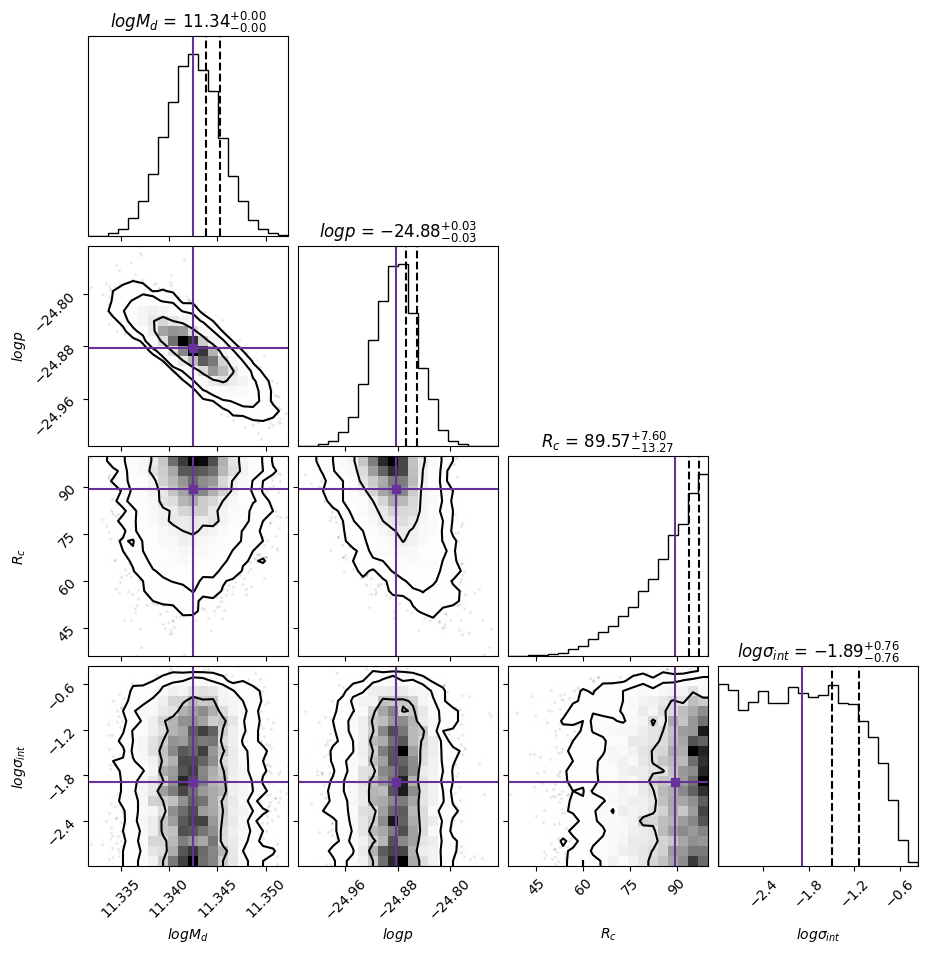

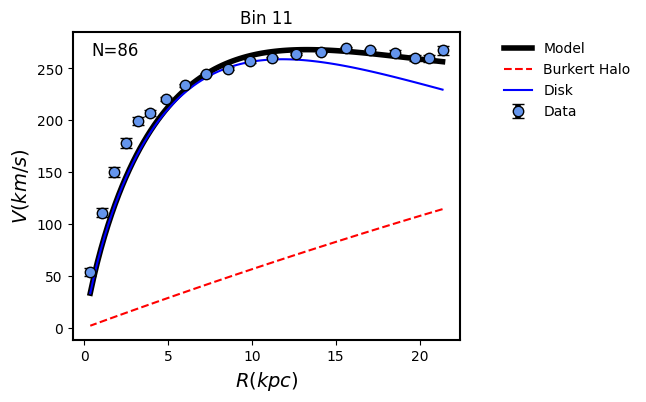

In [205]:
theta_max=np.median(samples,axis=0)
fig = corner.corner(samples,show_titles=True,labels=labels,truths=theta_max,truth_color='rebeccapurple',
                    quantiles=[0.68,0.84],levels=(0.68,0.95,0.99))
plot_vels(10,theta_max)

In [206]:
best.append(np.round(theta_max,2))
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.49, -24.79,  85.61,  -0.32]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 10.74, -25.34,  82.75,   0.09]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61]),
 array([ 11.34, -24.88,  89.57,  -1.89])]

In [226]:
best

[array([  8.8 , -24.69,   9.93,  -2.05]),
 array([  9.59, -24.92,  53.18,  -1.95]),
 array([  9.66, -24.15,   7.3 ,  -1.97]),
 array([ 10.04, -24.49,  18.1 ,  -1.95]),
 array([ 10.29, -24.62,  64.38,  -1.94]),
 array([ 10.49, -24.79,  85.91,  -0.31]),
 array([ 10.74, -25.34,  76.35,   0.09]),
 array([ 1.084e+01, -2.494e+01,  8.765e+01,  8.000e-02]),
 array([ 11.02, -25.09,  87.58,   0.16]),
 array([ 11.13, -24.87,  90.65,  -0.61]),
 array([ 11.34, -24.88,  89.57,  -1.89])]

In [8]:
best=np.array([
    np.array([  8.8 , -24.69,   9.93,  -2.05]),
 np.array([  9.59, -24.92,  53.18,  -1.95]),
 np.array([  9.66, -24.15,   7.3 ,  -1.97]),
 np.array([ 10.04, -24.49,  18.1 ,  -1.95]),
 np.array([ 10.29, -24.62,  64.38,  -1.94]),
 np.array([ 10.49, -24.79,  85.91,  -0.31]),
 np.array([ 10.74, -25.34,  76.35,   0.09]),
 np.array([ 1.084e+01, -2.494e+01,  8.765e+01,  8.000e-02]),
 np.array([ 11.02, -25.09,  87.58,   0.16]),
 np.array([ 11.13, -24.87,  90.65,  -0.61]),
 np.array([ 11.34, -24.88,  89.57,  -1.89])]
)

In [17]:
columns = ["logMd", "logp", "Rc", "logsigma_int"]
df = pd.DataFrame(np.array(best), columns=columns)
df

,logMd,logp,Rc,logsigma_int
0,8.80,-24.69,9.93,-2.05
1,9.59,-24.92,53.18,-1.95
2,9.66,-24.15,7.30,-1.97
3,10.04,-24.49,18.10,-1.95
4,10.29,-24.62,64.38,-1.94
5,10.49,-24.79,85.91,-0.31
6,10.74,-25.34,76.35,0.09
7,10.84,-24.94,87.65,0.08
8,11.02,-25.09,87.58,0.16
9,11.13,-24.87,90.65,-0.61


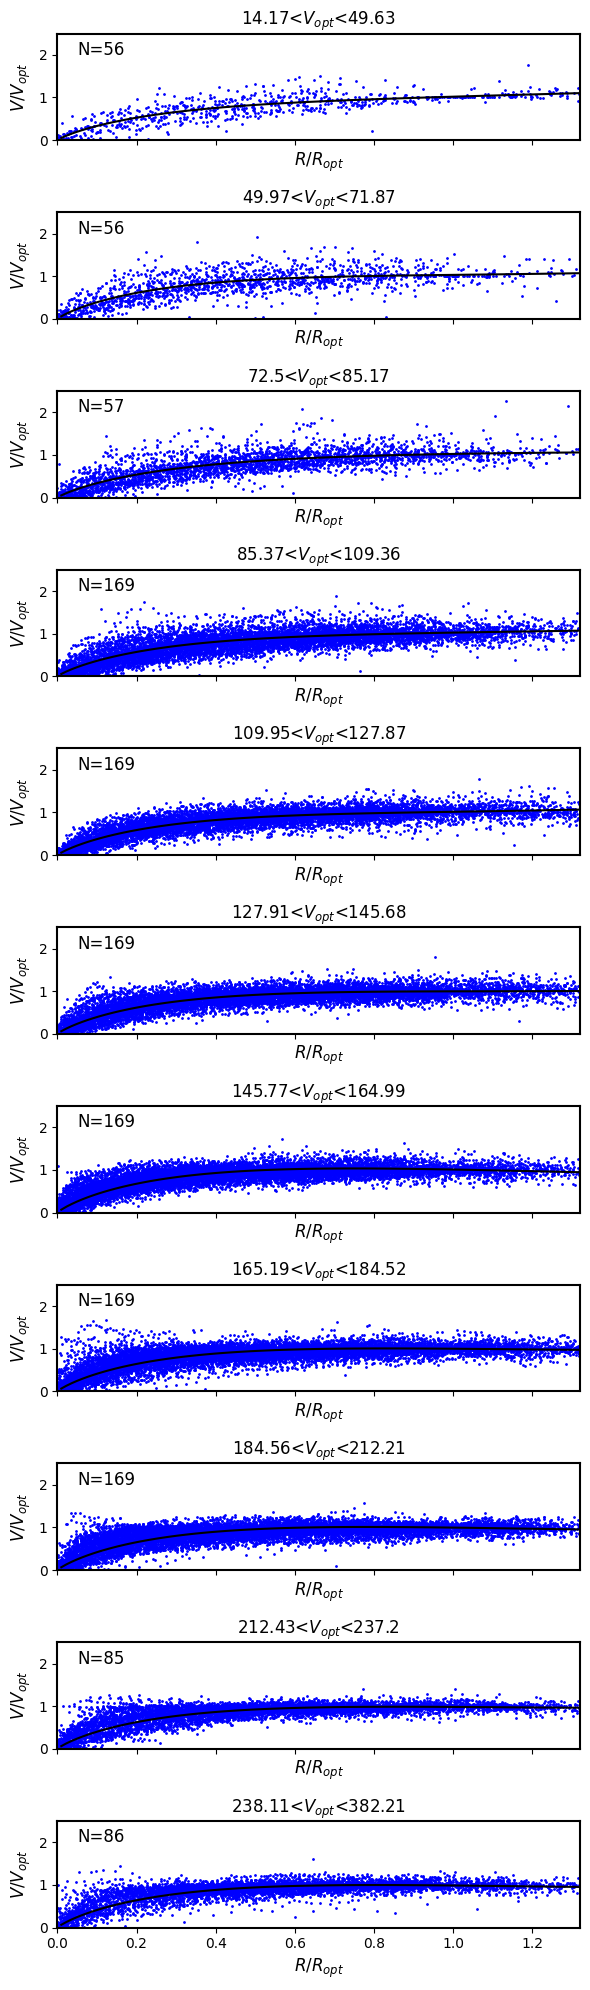

In [16]:
fig,ax=plt.subplots(11,figsize=(6,20),sharex=True,sharey=True)

for i in range(11):

    df2=pd.read_csv('log_vopt_binned_{}.csv'.format(i))

    xv=np.linspace(0.01,1.32,100)
    md,p0,rc,sigi=best[i]
    ropt=ropts[i]
    vopt=vopts[i]
    
    
    ax[i].scatter(df2['r'],df2['v'],s=1,color='blue')
    ax[i].plot(xv,np.sqrt(burkert(np.array([md,p0,rc,sigi]),xv*ropt,ropt,vopt)
                      +disk(np.array([md,p0,rc,sigi]),xv*ropt,ropt,vopt))/vopt,color='black')
    ax[i].set_xlabel('$R/R_{opt}$',fontsize='large')
    ax[i].set_ylabel('$V/V_{opt}$',fontsize='large')
    ax[i].set_ylim(0,2.5)
    ax[i].set_xlim(0,1.32)
    
    #plt.title('{}'.format(np.round(upper[i],2))+'$<V_{opt}<$'+'{}'.format(np.round(lower[i],2)))
    ax[i].text(x=0.05,y=2,s='N={}'.format(bb[i]),fontsize=12)
    ax[i].set_title('{}'.format(np.round(upper[i],2))+'<$V_{opt}$<'+'{}'.format(np.round(lower[i],2)),fontsize='large')
        
    ax[i].spines['top'].set_linewidth(1.5)
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].spines['right'].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('URCfit2.png')
plt.show()

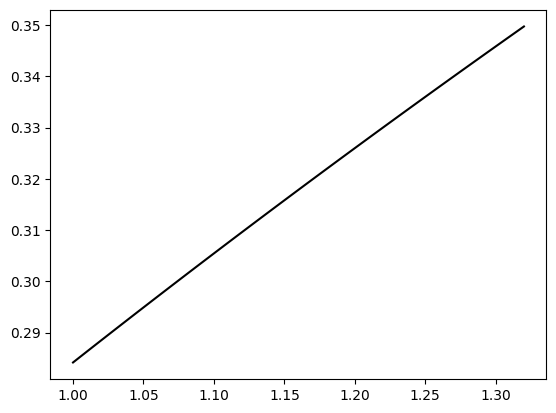

In [215]:
plt.plot(xv,np.sqrt(burkert(np.array([md,p0,rc,sigi]),xv,ropt,vopt)
                      +disk(np.array([md,p0,rc,sigi]),xv,ropt,vopt))/vopt,color='black')

## Blah

In [101]:
md=[9.42,10.04,10.29,10.49,10.74,10.84,11.02,11.25]
p=[-24.52,-24.56,-24.63,-24.79,-25.29,-24.89,-25.1,-24.94]

Text(0, 0.5, 'logMd')

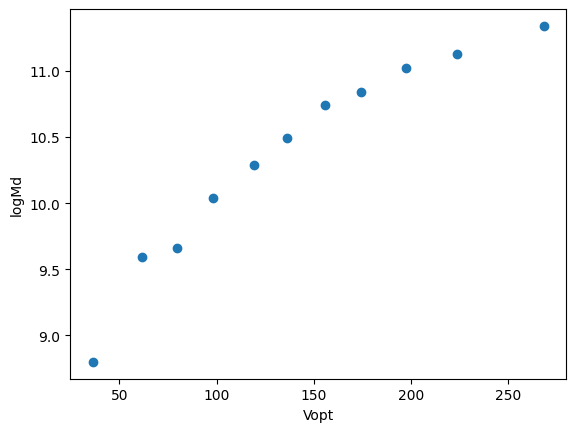

In [18]:
plt.scatter(vopts,df['logMd'])
plt.xlabel('Vopt')
plt.ylabel('logMd')

Text(0, 0.5, 'logp')

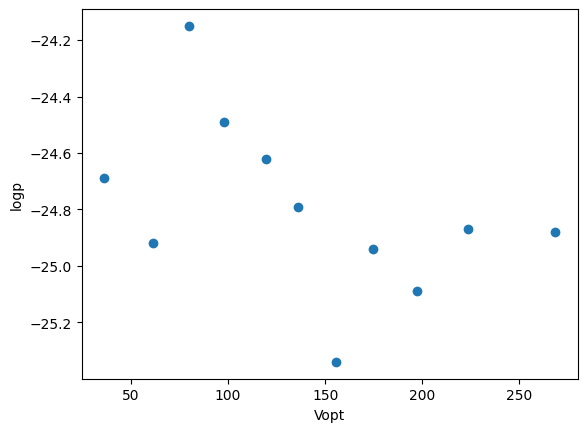

In [19]:
plt.scatter(vopts,df['logp'])
plt.xlabel('Vopt')
plt.ylabel('logp')

Text(0, 0.5, 'Rc')

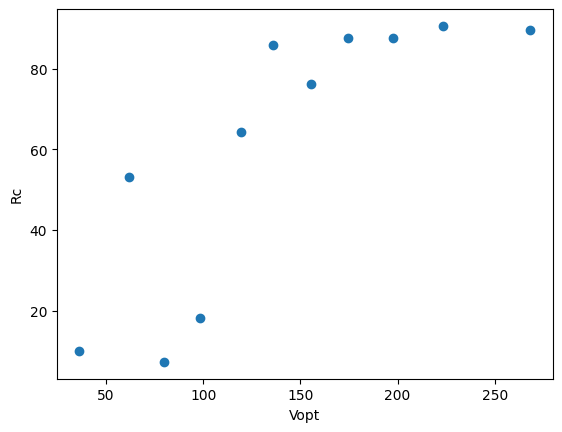

In [20]:
plt.scatter(vopts,df['Rc'])
plt.xlabel('Vopt')
plt.ylabel('Rc')